In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from scipy.stats import pearsonr

plt.style.use('ggplot')


## Processamento dei dati

In [2]:
# Dizionario per convertire i nomi dei geni in ID
sens_df = pd.read_csv("../date/omics_data/gene_effect/CRISPRGeneEffect_selected.csv", index_col=0)
gene_info = pd.read_csv("../date/Info/gene_info.csv", index_col=0)
gene_conv_dict = dict(zip(gene_info['gene_name'], gene_info.index))

In [ ]:
trascriptome = sc.read_h5ad('../date/omics_data/rna_seq_total') # Load the transcriptome data
trascriptome_df = pd.DataFrame(trascriptome.X, index=trascriptome.obs.index, columns=trascriptome.var.index)
trascriptome_df.head()

### Propensity e intensity

In [6]:
# Load NC TCA status data
nc_state = pd.read_csv("../date/Info/non_canonical_state.csv", index_col=0)
nc_state.columns 

Index(['propensity', 'flux intensity', 'Type'], dtype='object')

In [10]:
cell_notation = pd.read_csv("../date/Info/Cell_lines_annotations.txt", index_col=0, sep="\t")
cell_notation = cell_notation[["Histology"]]

In [11]:
cell_notation

,Histology
CCLE_ID,
DMS53_LUNG,carcinoma
SW1116_LARGE_INTESTINE,carcinoma
NCIH1694_LUNG,carcinoma
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,lymphoid_neoplasm
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,lymphoid_neoplasm
...,...
GEO_LARGE_INTESTINE,NaN
NCIH2330_LUNG,NaN
LP6_SOFT_TISSUE,NaN


In [8]:
nc_state["Type"] = nc_state.index.str.split("_", n=1).str[1].str.replace("_", " ")
nc_state.head()

,propensity,flux intensity,Type
22RV1_PROSTATE,0.3547,14.794442,PROSTATE
2313287_STOMACH,0.3046,13.072795,STOMACH
5637_URINARY_TRACT,0.5422,12.879744,URINARY TRACT
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.5623,10.430198,HAEMATOPOIETIC AND LYMPHOID TISSUE
769P_KIDNEY,0.4553,17.514556,KIDNEY


In [12]:
nc_state = nc_state.merge(cell_notation, left_index=True, right_index=True)
nc_state

,propensity,flux intensity,Type,Histology
22RV1_PROSTATE,0.3547,14.794442,PROSTATE,carcinoma
2313287_STOMACH,0.3046,13.072795,STOMACH,carcinoma
5637_URINARY_TRACT,0.5422,12.879744,URINARY TRACT,carcinoma
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.5623,10.430198,HAEMATOPOIETIC AND LYMPHOID TISSUE,lymphoid_neoplasm
769P_KIDNEY,0.4553,17.514556,KIDNEY,carcinoma
...,...,...,...,...
YD15_SALIVARY_GLAND,0.5833,11.371697,SALIVARY GLAND,carcinoma
YD38_UPPER_AERODIGESTIVE_TRACT,0.5822,11.212096,UPPER AERODIGESTIVE TRACT,carcinoma
YD8_UPPER_AERODIGESTIVE_TRACT,0.4779,13.736960,UPPER AERODIGESTIVE TRACT,carcinoma
ZR751_BREAST,0.3653,10.843867,BREAST,carcinoma


In [13]:
mask = nc_state["Type"] == "HAEMATOPOIETIC AND LYMPHOID TISSUE"
nc_state.loc[mask, "Type"] = nc_state.loc[mask, "Histology"].str.split("_").str[0]
nc_state


,propensity,flux intensity,Type,Histology
22RV1_PROSTATE,0.3547,14.794442,PROSTATE,carcinoma
2313287_STOMACH,0.3046,13.072795,STOMACH,carcinoma
5637_URINARY_TRACT,0.5422,12.879744,URINARY TRACT,carcinoma
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.5623,10.430198,lymphoid,lymphoid_neoplasm
769P_KIDNEY,0.4553,17.514556,KIDNEY,carcinoma
...,...,...,...,...
YD15_SALIVARY_GLAND,0.5833,11.371697,SALIVARY GLAND,carcinoma
YD38_UPPER_AERODIGESTIVE_TRACT,0.5822,11.212096,UPPER AERODIGESTIVE TRACT,carcinoma
YD8_UPPER_AERODIGESTIVE_TRACT,0.4779,13.736960,UPPER AERODIGESTIVE TRACT,carcinoma
ZR751_BREAST,0.3653,10.843867,BREAST,carcinoma


In [14]:
nc_state['Type'] = nc_state['Type'].str.upper()
nc_state

,propensity,flux intensity,Type,Histology
22RV1_PROSTATE,0.3547,14.794442,PROSTATE,carcinoma
2313287_STOMACH,0.3046,13.072795,STOMACH,carcinoma
5637_URINARY_TRACT,0.5422,12.879744,URINARY TRACT,carcinoma
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.5623,10.430198,LYMPHOID,lymphoid_neoplasm
769P_KIDNEY,0.4553,17.514556,KIDNEY,carcinoma
...,...,...,...,...
YD15_SALIVARY_GLAND,0.5833,11.371697,SALIVARY GLAND,carcinoma
YD38_UPPER_AERODIGESTIVE_TRACT,0.5822,11.212096,UPPER AERODIGESTIVE TRACT,carcinoma
YD8_UPPER_AERODIGESTIVE_TRACT,0.4779,13.736960,UPPER AERODIGESTIVE TRACT,carcinoma
ZR751_BREAST,0.3653,10.843867,BREAST,carcinoma


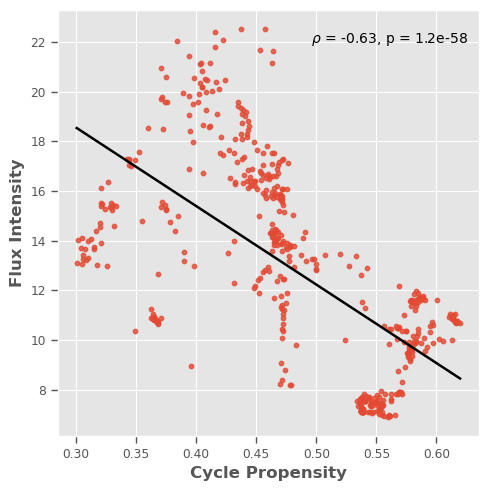

In [15]:
corr, pval = pearsonr(nc_state['propensity'], nc_state['flux intensity'])

sns.set_context("paper")

# Creazione del plot
plt.figure(figsize=(5, 5))
ax = sns.regplot(
    x='propensity',
    y='flux intensity',
    data=nc_state,
    ci=None,
    scatter_kws={'s': 10},
    line_kws={'color': 'black'}
)

plt.xlabel('Cycle Propensity', fontsize=12, fontweight='bold')
plt.ylabel('Flux Intensity', fontsize=12, fontweight='bold')

# Annotazione della correlazione (posizionamento relativo all’asse)
plt.text(0.6, 0.95, f"$\\rho$ = {corr:.2f}, p = {pval:.1e}",
         transform=ax.transAxes,
         fontsize=10,
         verticalalignment='top')

plt.tight_layout()
plt.show()


### Flux mean

In [ ]:
# contians average flux values of all samples
flux = pd.read_csv("../date/Info/cbs_mean_medium.csv", index_col=0)
flux.head()

,EX_lac__L_e,EX_glc__D_e,EX_glu__L_e,EX_gln__L_e,EX_asp__L_e,EX_co2_e,EX_h_e,EX_h2o_e,EX_pi_e,EX_nh4_e,...,t_Lcystin_glu__L,t_Lcystin_leu__L,t_Lcystin_ser__L,CSNATr,CRNCARtm,CSNATm,ACS,ACt2m,PyrODC,Incompox_Pyr
22RV1_PROSTATE,4.733091,-8.532274,-0.125745,-1.592310,-0.077560,43.917254,18.668539,29.819426,-0.053897,3.695611,...,0.044027,0.047360,0.046786,11.218473,11.218473,11.218473,6.751126,-6.751126,0.220405,6.530722
2313287_STOMACH,4.482886,-8.540756,-0.126981,-1.700525,-0.080548,45.149638,6.387748,37.792348,-0.057846,3.833157,...,0.068128,0.040307,0.037229,1.165948,1.165948,1.165948,0.298509,-0.298509,0.099046,0.199462
5637_URINARY_TRACT,5.923773,-7.895253,-0.122165,-1.512696,-0.074500,34.787583,20.308092,20.862460,-0.048968,3.330389,...,0.086778,0.032498,0.033985,13.221764,13.221764,13.221764,7.659994,-7.659994,0.039843,7.620152
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,5.271437,-7.592021,-0.110933,-1.854425,-0.003142,35.988115,19.393100,20.410546,-0.057599,3.735923,...,0.058519,0.038795,0.045500,14.454408,14.454408,14.454408,8.030370,-8.030370,0.045988,7.984383
769P_KIDNEY,5.243026,-8.403162,-0.123561,-1.425951,-0.059527,39.751752,21.501630,25.035621,-0.048876,3.219669,...,0.067346,0.040907,0.034629,13.849852,13.849852,13.849852,8.326757,-8.326757,0.041970,8.284788


### Propensity vs intensity

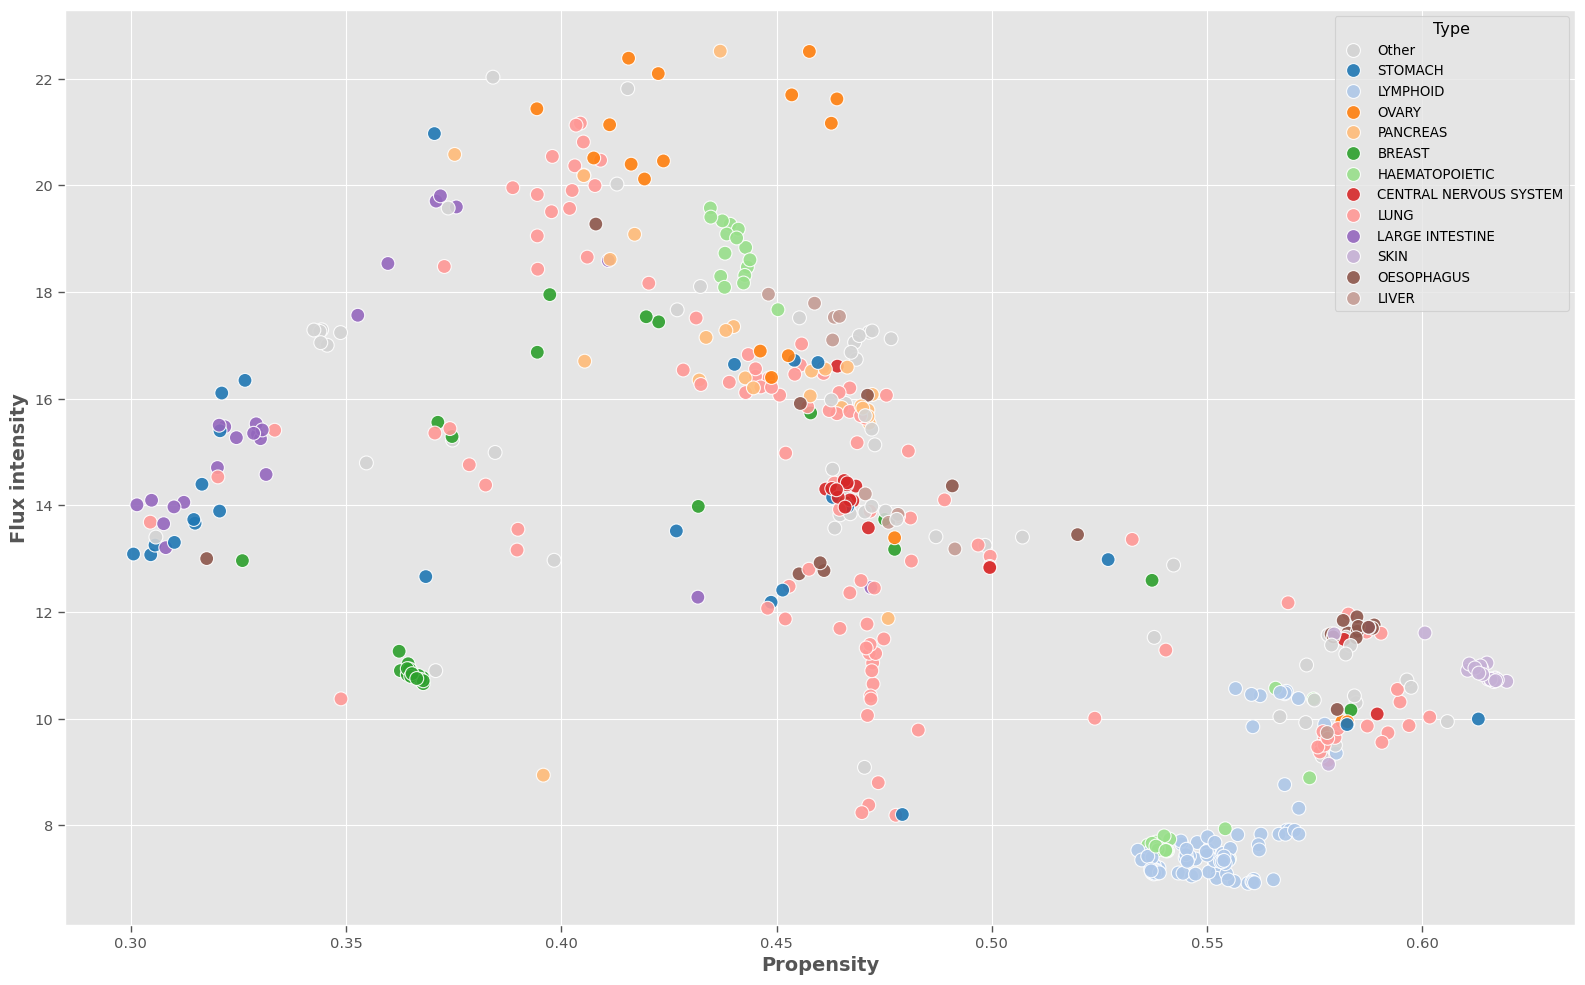

In [18]:
min_count = 10

counts = nc_state['Type'].value_counts()
small_types = counts[counts < min_count].index
nc_state['Type_agg'] = nc_state['Type'].where(
    ~nc_state['Type'].isin(small_types),
    other='Other'
)

major_types = [t for t in nc_state['Type_agg'].unique() if t != 'Other']
base_palette = sns.color_palette("tab20", n_colors=len(major_types))
palette = dict(zip(major_types, base_palette))
palette['Other'] = 'lightgrey'

sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=nc_state,
    x="propensity",
    y="flux intensity",
    hue="Type_agg",
    palette=palette,
    alpha=0.9,
    s=100,
    edgecolor='w'
)
plt.xlabel("Propensity", fontsize=14, fontweight='bold')
plt.ylabel("Flux intensity", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', title='Type', fontsize='small')
plt.tight_layout()
plt.show()



### Warburg

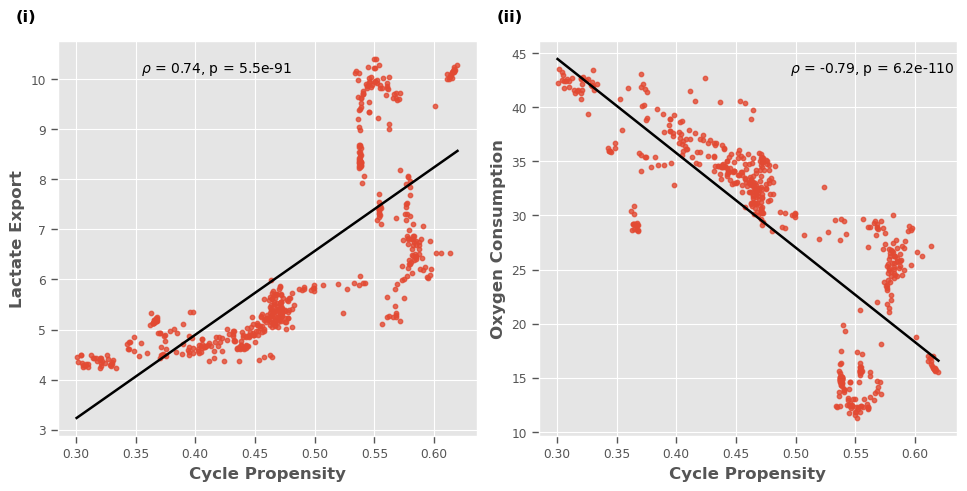

In [19]:
# Calcolo delle correlazioni
corr_lac, pval_lac = pearsonr(nc_state["propensity"], flux["EX_lac__L_e"])
corr_o2, pval_o2 = pearsonr(nc_state["propensity"], -flux["EX_o2_e"])

# Setup del contesto e figura
sns.set_context("paper")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1x2 layout

sns.regplot(
    x=nc_state["propensity"],
    y=flux["EX_lac__L_e"],
    ci=None,
    scatter_kws={'s': 10},
    line_kws={'color': 'black'},
    ax=axes[0]
)
axes[0].set_xlabel('Cycle Propensity', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Lactate Export', fontsize=12, fontweight='bold')
axes[0].text(0.2, 0.95, f"$\\rho$ = {corr_lac:.2f}, p = {pval_lac:.1e}",
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
axes[0].text(-0.1, 1.05, "(i)", transform=axes[0].transAxes, fontsize=12, fontweight="bold")


sns.regplot(
    x=nc_state["propensity"],
    y=-flux["EX_o2_e"],
    ci=None,
    scatter_kws={'s': 10},
    line_kws={'color': 'black'},
    ax=axes[1]
)
axes[1].set_xlabel('Cycle Propensity', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Oxygen Consumption', fontsize=12, fontweight='bold')
axes[1].text(0.6, 0.95, f"$\\rho$ = {corr_o2:.2f}, p = {pval_o2:.1e}",
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top')
axes[1].text(-0.1, 1.05, "(ii)", transform=axes[1].transAxes, fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


###